In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
def coord(image):
    image = cv2.imread(image,cv2.IMREAD_UNCHANGED)
    # Ensure image has an alpha channel
    if image.shape[2] < 4:
        raise ValueError("Image does not have an alpha channel")

    # Extract the alpha channel
    alpha = image[:, :, 3]

    # Find all non-transparent pixels
    coords = cv2.findNonZero(alpha)  # Returns coordinates of non-zero (non-transparent) pixels

    # Get bounding box for non-transparent region
    x, y, w, h = cv2.boundingRect(coords)

    return x,y,w,h

In [18]:
troops = ["barbarian","prince","giant","minion","dragon"]
data = pd.read_csv("/Users/tusharsingharoy/coderoyale/data/image_centers/troops_center.csv")

for troop in troops:
    print(troop)
    image = f'/Users/tusharsingharoy/coderoyale/data/images/troops/Blue/{troop}_run_n_6.png'
    x,y,w,h = coord(image)
    new_row = pd.DataFrame({'troop': [troop], 'x': [x+w//2], "y" : [y+h], "w": [w], "h" : [h]})
    data = pd.concat([data, new_row], ignore_index=True)
data.to_csv("/Users/tusharsingharoy/coderoyale/data/image_centers/troops_center.csv",index=False)

barbarian
prince
giant
minion
dragon


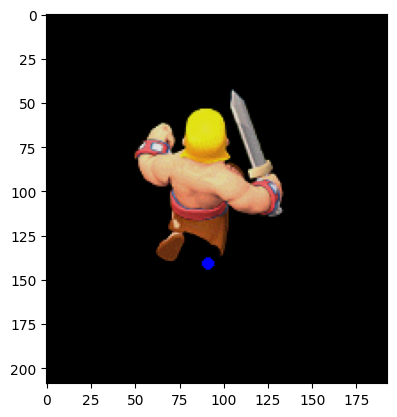

In [5]:
cv2.circle(image, (x+w//2,y+h), 2, (255,0,0), 2)
image_rgb =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)